In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.externals import joblib
from sklearn.svm import SVC
import nltk
import pickle
import  dill as pickle
cols_names =  [ 'HADM_ID', 'CHARTTIME', 'CATEGORY', 'DESCRIPTION', 'ICU Admit Time', 'TEXT', 'Note2', 'Note3', 'Note Difference', 'Group_Text', 'PreICU LOS', 'Hosp_Death', 'ICU_Mortality', 'AGE', 'Gender M=1F=0', 'MAP', 'Systolic', 'Avg Diastolic', 'Avg HR', 'AVG RR', 'Avg T', 'Min T', 'Avg Alb', 'Avg AG', 'Avg Cr', 'Avg WBC', 'Min WBC', 'PT avg', 'Avg Hgb', 'Plt', 'Na', 'Avg Gluc', 'Avg K', 'GCS'
]
%matplotlib inline

In [32]:
data = pd.read_excel(r"C:\Users\mvf11\Desktop\Research\NLP\NoteMort.xlsx", "Sheet1", header=None, names=cols_names)
data [0:10]

,HADM_ID,CHARTTIME,CATEGORY,DESCRIPTION,ICU Admit Time,TEXT,Note2,Note3,Note Difference,Group_Text,...,Avg Cr,Avg WBC,Min WBC,PT avg,Avg Hgb,Plt,Na,Avg Gluc,Avg K,GCS
0,165715,2181-11-22 06:07:00,Physician,Intensivist Note,2181-11-23 17:47:33,SICU\n HPI:\n 53 yo M with in [**9-16**] h...,SICU\n HPI:\n 53 yo M with in [**9-16**] h...,NaN,-1.486493,SICU\n HPI:\n 53 yo M with in [**9-16**] h...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,14.000000
1,103098,2176-11-20 06:18:00,Physician,Intensivist Note,2176-11-21 16:31:59,CVICU\n HPI:\n HD2\n [**11-20**] POD 1\n...,CVICU\n HPI:\n HD2\n [**11-20**] POD 1\n...,NaN,-1.426377,CVICU\n HPI:\n HD2\n [**11-20**] POD 1\n...,...,0.70,5.70,5.7,16.50,NaN,182.0,138.0,133.0,4.70,10.000000
2,175432,2108-01-23 04:46:00,Physician,Intensivist Note,2160-07-09 18:12:58,TITLE:\n Chief Complaint:\n 24 Hour Events...,"TITLE:\n Chief Complaint: Rigors, shortness...",TITLE:\n Chief Complaint:\n 24 Hour Events...,0.476412,TITLE:\n Chief Complaint:\n 24 Hour Events...,...,0.90,3.00,3.0,15.20,10.6,102.0,139.0,83.0,3.70,13.333333
3,181315,2117-11-18 18:03:00,Physician,Physician Attending Admission Note - MICU,2168-11-04 16:33:48,Chief Complaint: OSH transfer from [**Hospita...,"Chief Complaint: MRSA sepsis, access issues.\n...",Chief Complaint: OSH transfer from [**Hospita...,0.127222,Chief Complaint: OSH transfer from [**Hospita...,...,8.45,11.40,10.5,18.70,8.0,68.5,133.5,91.0,3.75,15.000000
4,187311,2125-11-20 08:24:00,Physician,Intensivist Note,2124-09-13 23:18:28,Chief Complaint: Intracranial hemorrhage\n H...,Chief Complaint: Intracranial hemorrhage\n H...,NaN,0.142037,Chief Complaint: Intracranial hemorrhage\n H...,...,1.00,27.50,27.5,14.80,13.9,123.0,114.0,121.0,3.80,7.666667
5,152311,2100-12-29 03:32:00,Physician,Physician Resident Admission Note,2145-05-22 00:07:53,SICU\n HPI:\n 48 y/o f s/p R free tram [**...,SICU\n HPI:\n 48 y/o f s/p R free tram [**...,NaN,0.139664,SICU\n HPI:\n 48 y/o f s/p R free tram [**...,...,0.70,14.30,13.3,15.10,8.7,224.5,140.0,136.0,3.60,14.333333
6,137296,2132-06-06 05:27:00,Physician,Intensivist Note,2188-12-18 10:36:04,CVICU\n HPI:\n HD3\n [**12-19**] POD [**...,NaN,NaN,0.927731,CVICU\n HPI:\n HD3\n [**12-19**] POD [**...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
7,145965,2133-02-18 22:01:00,Physician,Cardiology Fellow Admission Note/ Addendum,2109-02-24 04:16:11,TITLE: Cardiology Fellow Admission Note Addend...,TITLE:\n Cardiology Teaching Physician Note\...,"Chief Complaint: Chest Pain, STEMI\n HPI:\n...",0.013067,TITLE: Cardiology Fellow Admission Note Addend...,...,1.00,10.60,10.1,NaN,15.2,285.5,137.0,87.0,4.30,15.000000
8,166086,2186-03-23 04:21:00,Physician,Intensivist Note,2192-10-17 19:41:52,SICU\n HPI:\n 54 year old female presents ...,SICU\n HPI:\n 54 year old female presents ...,Chief Complaint: left cerebellar mass\n HPI:...,0.511204,SICU\n HPI:\n 54 year old female presents ...,...,0.70,6.45,5.1,12.90,12.4,259.5,139.0,142.0,4.20,10.000000
9,132994,2126-12-02 11:33:00,Physician,Physician Attending Admission Note - MICU,2144-12-24 16:16:41,Chief Complaint: Altered mental status\n HP...,Chief Complaint:\n 24 Hour Events:\n INVASIV...,Chief Complaint:\n 24 Hour Events:\n INVASIV...,0.334248,Chief Complaint: Altered mental status\n HP...,...,0.40,6.60,6.5,15.55,11.1,205.5,141.0,91.0,3.55,14.333333


In [33]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [34]:
#le = LabelEncoder()

In [35]:
#le.fit(data['CV'])
#data['CV'] = le.transform(data['CV'])

In [36]:
#data['CV'].unique()

In [37]:
data['Group_Text'] = data['Group_Text'].replace('\d+', 'NUM', regex=True)
data['Group_Text'] [0:10]

0    SICU\n   HPI:\n   NUM yo M with in [**NUM-NUM*...
1    CVICU\n   HPI:\n   HDNUM\n   [**NUM-NUM**] POD...
2    TITLE:\n   Chief Complaint:\n   NUM Hour Event...
3    Chief Complaint:  OSH transfer from [**Hospita...
4    Chief Complaint: Intracranial hemorrhage\n   H...
5    SICU\n   HPI:\n   NUM y/o f s/p R free tram [*...
6    CVICU\n   HPI:\n   HDNUM\n   [**NUM-NUM**] POD...
7    TITLE: Cardiology Fellow Admission Note Addend...
8    SICU\n   HPI:\n   NUM year old female presents...
9    Chief Complaint:  Altered mental status\n   HP...
Name: Group_Text, dtype: object

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
stopword = nltk.corpus.stopwords.words('english')
digit = ['aa', 'aao','aaoxnum','ab','chief','num','patient','nummg','__','_num', 'ml','mg', 'dl','icu', 'pm', 'history','medications','po','comments','hospitalnum','sponum', 'left', 'pain', 'total', 'right', 'last', 'meq', 'labs','respiratory', 'pulse', 'name', 'present', 'plan','code', 'balance', 'rhythm', 'pt', 'assessed', 'blood', 'fluid', 'hr', 'min', 'rr', 'assessment', 'chest', 'iv', 'normal', 'bp', 'status', 'urine', 'daily','given', 'edema', 'hct', 
'acute', 'allergies', 'care', 'extremities', 'ng', 'abdominal', 'snum', 'prn', 'heart', 'control', 'signs', 'likely','onum']
digits = ['num', 'dl','_num', 'javascript', 'ml', 'mg', 'meq','plan']
stopword.extend(digit)

In [40]:
from string import digits 
import pickle
import  dill as pickle


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=stopword,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=4000,
    vocabulary=None,
    binary=False)
data_cv = cv.fit_transform(data['Group_Text'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
#data_dtm1 = pd.merge(data['Row_ID'], data_dtm, right_index=True, left_index=True)
data_dtm [0:10]


,aaa,abd,abdomen,abdominial,abg,abgs,ability,ablation,able,abnormal,...,yom,young,yr,yrs,zocor,zofran,zoloft,zolpidem,zosyn,zyprexa
0,0,0,2,0,2,0,0,0,1,0,...,0,0,0,0,0,2,0,0,0,0
1,0,0,2,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,2,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,2,4,0,2,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
6,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
7,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,2,2,0,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


In [42]:
sum_words = data_cv.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[0:40]

[('dose', 25303),
 ('prophylaxis', 24699),
 ('continue', 24406),
 ('since', 24113),
 ('drains', 22893),
 ('hours', 22892),
 ('nutrition', 22867),
 ('ct', 22760),
 ('ul', 22341),
 ('mmhg', 22227),
 ('lines', 22128),
 ('medical', 22107),
 ('ivf', 21955),
 ('non', 21802),
 ('sounds', 21727),
 ('family', 21602),
 ('dvt', 21409),
 ('gauge', 21280),
 ('tube', 21126),
 ('antibiotics', 21065),
 ('neurologic', 21027),
 ('full', 21019),
 ('time', 20976),
 ('cardiovascular', 20934),
 ('stool', 20915),
 ('monitoring', 20836),
 ('disposition', 19959),
 ('renal', 19944),
 ('heparin', 19876),
 ('ulcer', 19773),
 ('stress', 19475),
 ('sinus', 19396),
 ('imagenum', 19274),
 ('communication', 19234),
 ('data', 19169),
 ('physical', 19151),
 ('hemodynamic', 19029),
 ('review', 18939),
 ('abg', 18838),
 ('admission', 18810)]

In [43]:
Z = ['PreICU LOS', 'AGE', 'Systolic', 'Avg Diastolic', 'Avg HR', 'AVG RR', 'Avg T', 'Avg WBC', 'Min WBC','Avg Alb', 'Avg AG', 'Avg Cr',  'PT avg', 'Avg Hgb', 'Plt', 'Na', 'Avg K','Avg Gluc', 'GCS']
Z [0:10]

['PreICU LOS',
 'AGE',
 'Systolic',
 'Avg Diastolic',
 'Avg HR',
 'AVG RR',
 'Avg T',
 'Avg WBC',
 'Min WBC',
 'Avg Alb']

In [44]:
X = pd.merge(data_dtm, data[Z], right_index=True, left_index=True)
y = data.Hosp_Death
X [0:10]

,aaa,abd,abdomen,abdominial,abg,abgs,ability,ablation,able,abnormal,...,Avg Alb,Avg AG,Avg Cr,PT avg,Avg Hgb,Plt,Na,Avg K,Avg Gluc,GCS
0,0,0,2,0,2,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,14.000000
1,0,0,2,0,2,0,0,0,0,0,...,NaN,9.0,0.70,16.50,NaN,182.0,138.0,4.70,133.0,10.000000
2,0,1,0,0,2,0,0,0,1,0,...,2.6,11.0,0.90,15.20,10.6,102.0,139.0,3.70,83.0,13.333333
3,0,1,0,0,1,0,0,0,0,2,...,2.6,20.0,8.45,18.70,8.0,68.5,133.5,3.75,91.0,15.000000
4,0,0,0,0,2,0,0,0,0,0,...,NaN,16.0,1.00,14.80,13.9,123.0,114.0,3.80,121.0,7.666667
5,0,2,4,0,2,0,0,0,0,0,...,NaN,11.0,0.70,15.10,8.7,224.5,140.0,3.60,136.0,14.333333
6,1,0,1,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
7,0,1,1,1,0,0,0,0,0,0,...,NaN,13.0,1.00,NaN,15.2,285.5,137.0,4.30,87.0,15.000000
8,0,2,2,0,3,0,0,0,0,0,...,NaN,13.0,0.70,12.90,12.4,259.5,139.0,4.20,142.0,10.000000
9,0,1,0,0,1,0,0,0,1,1,...,3.6,11.5,0.40,15.55,11.1,205.5,141.0,3.55,91.0,14.333333


In [45]:
X1 = X.fillna(X.mean())
X1 [0:10]
plt.savefig('NLPmatrix.png')

,aaa,abd,abdomen,abdominial,abg,abgs,ability,ablation,able,abnormal,...,Avg Alb,Avg AG,Avg Cr,PT avg,Avg Hgb,Plt,Na,Avg K,Avg Gluc,GCS
0,0,0,2,0,2,0,0,0,1,0,...,3.097854,13.505295,1.466264,16.448152,10.84201,228.134832,139.003882,4.000000,134.659406,14.000000
1,0,0,2,0,2,0,0,0,0,0,...,3.097854,9.000000,0.700000,16.500000,10.84201,182.000000,138.000000,4.700000,133.000000,10.000000
2,0,1,0,0,2,0,0,0,1,0,...,2.600000,11.000000,0.900000,15.200000,10.60000,102.000000,139.000000,3.700000,83.000000,13.333333
3,0,1,0,0,1,0,0,0,0,2,...,2.600000,20.000000,8.450000,18.700000,8.00000,68.500000,133.500000,3.750000,91.000000,15.000000
4,0,0,0,0,2,0,0,0,0,0,...,3.097854,16.000000,1.000000,14.800000,13.90000,123.000000,114.000000,3.800000,121.000000,7.666667
5,0,2,4,0,2,0,0,0,0,0,...,3.097854,11.000000,0.700000,15.100000,8.70000,224.500000,140.000000,3.600000,136.000000,14.333333
6,1,0,1,0,1,0,0,0,0,0,...,3.097854,13.505295,1.466264,16.448152,10.84201,228.134832,139.003882,4.149453,134.659406,7.000000
7,0,1,1,1,0,0,0,0,0,0,...,3.097854,13.000000,1.000000,16.448152,15.20000,285.500000,137.000000,4.300000,87.000000,15.000000
8,0,2,2,0,3,0,0,0,0,0,...,3.097854,13.000000,0.700000,12.900000,12.40000,259.500000,139.000000,4.200000,142.000000,10.000000
9,0,1,0,0,1,0,0,0,1,1,...,3.600000,11.500000,0.400000,15.550000,11.10000,205.500000,141.000000,3.550000,91.000000,14.333333


In [46]:
X = preprocessing.normalize(X1)
X = pd.DataFrame(X, columns = X1.columns)
X [0:10]

,aaa,abd,abdomen,abdominial,abg,abgs,ability,ablation,able,abnormal,...,Avg Alb,Avg AG,Avg Cr,PT avg,Avg Hgb,Plt,Na,Avg K,Avg Gluc,GCS
0,0.000000,0.000000,0.005428,0.00000,0.005428,0.0,0.0,0.0,0.002714,0.000000,...,0.008407,0.036652,0.003979,0.044639,0.029424,0.619137,0.377243,0.010856,0.365453,0.037995
1,0.000000,0.000000,0.006034,0.00000,0.006034,0.0,0.0,0.0,0.000000,0.000000,...,0.009346,0.027151,0.002112,0.049777,0.032708,0.549058,0.416318,0.014179,0.401234,0.030168
2,0.000000,0.003458,0.000000,0.00000,0.006917,0.0,0.0,0.0,0.003458,0.000000,...,0.008992,0.038043,0.003113,0.052568,0.036659,0.352758,0.480719,0.012796,0.287048,0.046112
3,0.000000,0.003627,0.000000,0.00000,0.003627,0.0,0.0,0.0,0.000000,0.007253,...,0.009429,0.072532,0.030645,0.067817,0.029013,0.248422,0.484152,0.013600,0.330021,0.054399
4,0.000000,0.000000,0.000000,0.00000,0.006838,0.0,0.0,0.0,0.000000,0.000000,...,0.010592,0.054706,0.003419,0.050603,0.047526,0.420551,0.389779,0.012993,0.413713,0.026213
5,0.000000,0.005502,0.011003,0.00000,0.005502,0.0,0.0,0.0,0.000000,0.000000,...,0.008522,0.030260,0.001926,0.041538,0.023933,0.617571,0.385122,0.009903,0.374119,0.039429
6,0.002642,0.000000,0.002642,0.00000,0.002642,0.0,0.0,0.0,0.000000,0.000000,...,0.008184,0.035680,0.003874,0.043455,0.028644,0.602723,0.367243,0.010963,0.355765,0.018494
7,0.000000,0.002610,0.002610,0.00261,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.008087,0.033936,0.002610,0.042937,0.039679,0.745285,0.357632,0.011225,0.227110,0.039157
8,0.000000,0.005156,0.005156,0.00000,0.007734,0.0,0.0,0.0,0.000000,0.000000,...,0.007986,0.033512,0.001805,0.033254,0.031966,0.668956,0.358323,0.010827,0.366057,0.025779
9,0.000000,0.002972,0.000000,0.00000,0.002972,0.0,0.0,0.0,0.002972,0.002972,...,0.010699,0.034177,0.001189,0.046214,0.032989,0.610735,0.419044,0.010550,0.270447,0.042598


In [47]:
# x and Y split for cross validation
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.30)

In [48]:
X_test [0:10]

,aaa,abd,abdomen,abdominial,abg,abgs,ability,ablation,able,abnormal,...,Avg Alb,Avg AG,Avg Cr,PT avg,Avg Hgb,Plt,Na,Avg K,Avg Gluc,GCS
4200,0.0,0.000000,0.006963,0.000000,0.006963,0.0,0.0,0.000000,0.000000,0.0,...,0.007190,0.032494,0.002089,0.026460,0.030870,0.756657,0.327266,0.009980,0.311019,0.034816
1914,0.0,0.000000,0.000000,0.000000,0.004851,0.0,0.0,0.000000,0.000000,0.0,...,0.007514,0.024255,0.001698,0.034684,0.024497,0.669424,0.344414,0.009702,0.380796,0.036382
3534,0.0,0.003024,0.009071,0.000000,0.006047,0.0,0.0,0.003024,0.006047,0.0,...,0.009366,0.033259,0.003931,0.049732,0.033864,0.501908,0.426320,0.009978,0.275143,0.045353
4668,0.0,0.004514,0.004514,0.000000,0.004514,0.0,0.0,0.000000,0.006772,0.0,...,0.006993,0.039501,0.002596,0.025506,0.030924,0.711021,0.310366,0.012866,0.395012,0.030849
7550,0.0,0.000000,0.000000,0.000000,0.008985,0.0,0.0,0.000000,0.000000,0.0,...,0.007936,0.036937,0.002995,0.045522,0.039382,0.554048,0.423273,0.016472,0.414288,0.032943
852,0.0,0.002508,0.002508,0.002508,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.007769,0.030095,0.002508,0.041251,0.023073,0.687172,0.346094,0.012790,0.336062,0.037619
152,0.0,0.000000,0.004905,0.000000,0.004905,0.0,0.0,0.000000,0.000000,0.0,...,0.007597,0.042915,0.001717,0.028201,0.033964,0.719748,0.344547,0.009932,0.337190,0.033106
7023,0.0,0.000000,0.000000,0.000000,0.008510,0.0,0.0,0.000000,0.000000,0.0,...,0.006595,0.025529,0.001915,0.042655,0.020636,0.760554,0.293585,0.008403,0.399956,0.031202
7466,0.0,0.002787,0.000000,0.000000,0.011149,0.0,0.0,0.000000,0.000000,0.0,...,0.008634,0.037641,0.004087,0.045843,0.028429,0.563001,0.387422,0.011565,0.375313,0.041807
462,0.0,0.000000,0.002978,0.000000,0.011910,0.0,0.0,0.000000,0.000000,0.0,...,0.006253,0.032753,0.000893,0.034539,0.026649,0.583590,0.415361,0.009379,0.403451,0.031760


In [49]:
y_test [0:10]

4200    0
1914    0
3534    0
4668    0
7550    1
852     0
152     0
7023    1
7466    0
462     1
Name: Hosp_Death, dtype: int64

In [50]:
# Create a random forest classifier
from sklearn import metrics
model = SVC(kernel='linear',probability=True)

In [51]:
# Train the classifier
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
#pickle.dump(model, open("NoteMortSVM.dat", "wb"), protocol = 4)

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from xgboost import plot_importance
from sklearn.metrics import roc_auc_score 
#Class predictions
y_pred_class = model.predict(X_test)

In [24]:
#scores1 = cross_val_score(model, X, y, cv=10, scoring = make_scorer(roc_auc_score,needs_proba=True))

In [25]:
#print(scores1.mean(), scores1.std() * 2)

0.8843667046000743 0.046076385257851876


In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from xgboost import plot_importance
from sklearn.calibration import calibration_curve
#Class predictions
y_pred_class = model.predict(X_test)

In [55]:
#creating labels for confusion matrix
from sklearn import metrics
print('true:', y_test.values[0:100])
print('pred:', y_pred_class[0:100])

true: [0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [56]:
#Confusion matrix slices
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)

[[2078    0]
 [ 189    0]]


In [57]:
#accuracy Calculation
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9166299073665637
0.9166299073665637


In [58]:
#calculating null accuracy
max(y_test.mean(), 1-y_test.mean())

0.9166299073665638

In [59]:
#Senitivity
print(metrics.recall_score(y_test, y_pred_class))
TP / float(TP + FN)

0.0


0.0

In [60]:
#Specificity
print(TN / float(TN + FP))

1.0


In [61]:
#Store Predicted Prob
y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred_prob

array([0.00800134, 0.01225352, 0.00427897, ..., 0.00402613, 0.00413306,
       0.09676685])

In [62]:
#AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.8786327920110404

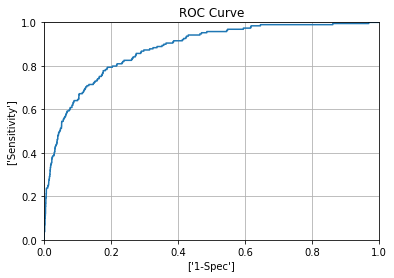

In [77]:
from sklearn.metrics import roc_curve  
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob, pos_label=1)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curve")
plt.xlabel(['1-Spec'])
plt.ylabel(['Sensitivity'])
plt.grid(True)
plt.savefig('ROCNoteMOrt.png')

In [64]:
(model_y, model_x) = calibration_curve(y_test, y_pred_prob, n_bins=10,strategy='quantile')

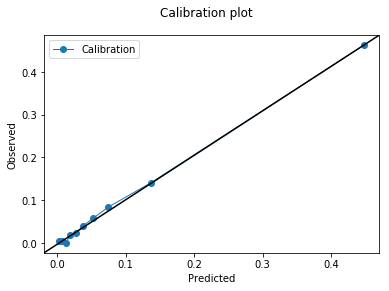

In [76]:
%matplotlib inline
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(model_x,model_y, marker='o', linewidth=1, label='Calibration')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted')
ax.set_ylabel('Observed')
plt.legend()
#plt.show()
plt.savefig('CalibrationNoteMOrt.png')

In [66]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [67]:
evaluate_threshold(0.12)

Sensitivity: 0.6825396825396826
Specificity: 0.8825794032723773


In [68]:
from sklearn.model_selection import learning_curve

In [69]:
#Creating learning curves
#train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring = make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

In [70]:
#Means and std of test/train scores
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

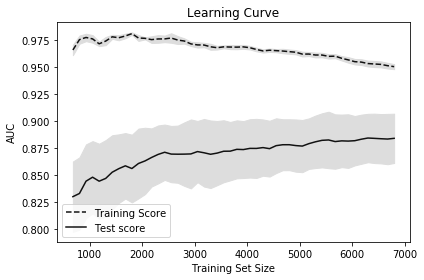

In [75]:
#PLot lines of learning curve
plt.plot(train_sizes, train_mean, '--', color="#111111", label = "Training Score")
plt.plot(train_sizes, test_mean, color = "#111111", label = "Test score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("AUC"), plt.legend(loc="best")
plt.tight_layout()
#plt.show()
plt.savefig('LearningNoteMOrt.png')

In [387]:
#y_test = le.inverse_transform(y_test)


In [388]:
#y_pred_class = le.inverse_transform(y_pred_class)

In [389]:
#y_test [0:10] PROBLMSS BELOW

In [61]:
df1 = np.array(y_pred_prob)
df2 = np.array(y_test)
df3 = pd.DataFrame(df1, df2)
df3 [0:10]

,0
0,0.007686
0,0.011814
0,0.004089
0,0.014709
1,0.305074
0,0.007803
0,0.055507
1,0.299351
0,0.083593
1,0.436758


In [47]:
filepath = r'c:\\Users\mvf11\Desktop\Research\NoteHospMortResults.xlsx'

In [48]:
df3.to_excel(filepath)